In [107]:
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt
from decimal import Decimal

In [108]:
ratingData = pd.read_csv('D:\\IIITB\\Semester 2\\RS\\Mini-Project\\Dataset\\ratings.dat',
                        names=['user_id', 'movie_id', 'rating', 'time'],
                        engine='python', delimiter='::')

movieData = pd.read_csv('D:\\IIITB\\Semester 2\\RS\\Mini-Project\\Dataset\\movies.dat',
                        names=['movie_id', 'title', 'genre'],
                        engine='python', delimiter='::',encoding='latin-1')

userData = pd.read_csv('D:\\IIITB\\Semester 2\\RS\\Mini-Project\\Dataset\\users.dat', 
                       names=['user_id', 'gender', 'age', 'occupation', 'zip'],
                       engine='python', delimiter='::')

In [109]:
userData

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [110]:
# Each genre as different feature
movieData['genre'] = movieData['genre'].apply(lambda x: x.split('|'))
unique_genres = set(genre for sublist in movieData['genre'] for genre in sublist)
for genre in unique_genres:
    movieData[f'genre_{genre}'] = movieData['genre'].apply(lambda x: 1 if genre in x else 0)
movieData = movieData.drop(columns=['genre'])
movieData

,movie_id,title,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama
0,1,Toy Story (1995),0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,2,Jumanji (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,3,Grumpier Old Men (1995),0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [111]:
# Merged the datasets
mergedData = pd.merge(ratingData, movieData, on='movie_id')
mergedData = pd.merge(mergedData, userData, on='user_id')
mergedData

,user_id,movie_id,rating,time,title,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,...,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,...,0,0,0,0,0,1,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),0,0,0,0,0,...,0,0,1,0,0,0,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),0,0,0,1,0,...,0,0,0,0,0,0,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),0,0,0,0,0,...,0,0,0,0,0,1,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",0,0,0,0,0,...,1,0,1,0,0,0,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),0,0,0,0,0,...,0,0,0,0,0,1,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),0,0,0,0,0,...,0,0,0,0,0,0,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),1,0,0,0,0,...,0,0,0,0,0,0,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),0,0,1,0,0,...,0,0,0,0,0,0,M,45,5,77662


In [112]:
genre_columns = mergedData.columns[mergedData.columns.str.startswith('genre')]
for genre_column in genre_columns:
    mergedData[genre_column] *= mergedData['rating']
genre_columns

Index(['genre_Horror', 'genre_Documentary', 'genre_War', 'genre_Romance',
       'genre_Thriller', 'genre_Animation', 'genre_Crime', 'genre_Mystery',
       'genre_Sci-Fi', 'genre_Action', 'genre_Western', 'genre_Musical',
       'genre_Comedy', 'genre_Film-Noir', 'genre_Children's',
       'genre_Adventure', 'genre_Fantasy', 'genre_Drama'],
      dtype='object')

In [113]:
data = mergedData[['user_id', 'movie_id', 'rating']]

In [114]:
mergedData = mergedData.drop(columns=['time', 'zip', 'title', 'rating', 'movie_id', 'gender', 'age', 'occupation'])
mergedData

,user_id,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,1,0,0,0,0,0,3,0,0,0,0,0,3,0,0,3,0,0,0
2,1,0,0,0,3,0,0,0,0,0,0,0,3,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,1,0,0,0,0,0,5,0,0,0,0,0,0,5,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1000205,4211,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
1000206,4211,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000207,4211,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


In [115]:
mergedData.replace(0, np.nan, inplace=True) # Replaced 0 with NaN
grouped_data = mergedData.groupby('user_id').mean() #Found the average rating per user for each genre
grouped_data

,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama
user_id,,,,,,,,,,,,,,,,,,
1,NaN,NaN,5.000000,3.666667,3.666667,4.111111,4.000000,NaN,4.333333,4.200000,NaN,4.285714,4.142857,NaN,4.250000,4.000000,4.00,4.428571
2,3.000000,NaN,3.733333,3.708333,3.483871,NaN,3.583333,3.333333,3.588235,3.500000,4.333333,NaN,3.560000,4.000000,NaN,3.736842,3.00,3.898734
3,2.666667,NaN,4.000000,3.800000,3.800000,4.000000,NaN,3.000000,3.833333,3.956522,4.666667,4.000000,3.766667,NaN,4.000000,4.000000,4.50,4.000000
4,4.333333,NaN,3.333333,4.000000,3.500000,NaN,5.000000,NaN,3.555556,4.157895,4.500000,NaN,NaN,NaN,4.000000,3.833333,4.50,4.166667
5,2.800000,3.666667,3.500000,3.100000,2.846154,4.000000,3.285714,3.125000,3.066667,2.612903,4.000000,3.333333,3.410714,4.000000,3.833333,3.000000,NaN,3.096154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,2.986486,3.909091,3.785714,3.352459,3.142857,3.911765,3.528302,3.411765,2.834320,3.000000,3.642857,3.709677,3.203065,4.058824,3.444444,2.987952,3.00,3.505376
6037,4.111111,4.000000,4.000000,3.681818,3.705882,4.000000,3.833333,3.692308,3.692308,3.642857,3.750000,4.000000,3.576271,3.444444,3.666667,4.000000,4.25,3.877551
6038,2.500000,NaN,4.000000,4.166667,NaN,3.666667,NaN,NaN,4.000000,3.000000,NaN,NaN,3.833333,NaN,3.000000,4.000000,NaN,3.888889


In [116]:
ind = grouped_data.index

In [117]:
def eucledian_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [118]:
def sortSecond(val):
    return val[1]

def knn(missingdata,k):
    print("knn1")
    fill_value = missingdata.copy()
    null_indexes = np.argwhere(np.isnan(missingdata))
    instances = missingdata.shape[0]
    nearests=[];
    for j in null_indexes:
        distances = []
        for i in range(instances):
            if(i==j[0]):
                continue
            else:
                if np.isnan(missingdata[i]).any():
                    continue
                d = eucledian_distance(missingdata[j[0]], missingdata[i])
                distances.append([missingdata[i][j[1]], d] )
        distances.sort(key = sortSecond)
        distances = np.array(distances)
        count = len(distances)
        nearest = []
        for l in range(count):
            nearest.append(distances[l,0])
        nearests.append(nearest)
        x = nearest[:k]
        mean = sum(x) / len(x)
        fill_value[j[0]][j[1]] = mean
    return fill_value,nearests

def knnquick(missingdata,k,pickleddists):
    print("knnquick")
    fill_value = missingdata.copy()
    null_indexes = np.argwhere(np.isnan(missingdata))
    instances = missingdata.shape[0]
    i=0
    for j in null_indexes:
        nearest=pickleddists[i]
        x = nearest[:k]
        mean = sum(x) / len(x)
        fill_value[j[0]][j[1]] = mean
        i+=1
    return fill_value

In [119]:
ori_data=grouped_data.values
ori_data

array([[       nan,        nan, 5.        , ..., 4.        , 4.        ,
        4.42857143],
       [3.        ,        nan, 3.73333333, ..., 3.73684211, 3.        ,
        3.89873418],
       [2.66666667,        nan, 4.        , ..., 4.        , 4.5       ,
        4.        ],
       ...,
       [2.5       ,        nan, 4.        , ..., 4.        ,        nan,
        3.88888889],
       [4.        ,        nan, 4.11111111, ..., 4.1       , 3.6       ,
        4.        ],
       [2.59090909, 4.5       , 3.69565217, ..., 2.81818182, 3.5       ,
        3.82162162]])

In [120]:
pickleddists=np.load('knnpickle.npy')

In [121]:
# Filling NaN values by calculating mean of nearest 10 neighbours
knn1 = knnquick(ori_data,10,pickleddists)

knnquick


In [122]:
knn1_df = pd.DataFrame(knn1)
knn1_df.columns=grouped_data.columns

In [123]:
knn1_df

,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama
0,3.466980,3.975051,5.000000,3.666667,3.666667,4.111111,4.000000,3.569986,4.333333,4.200000,3.696667,4.285714,4.142857,3.745833,4.250000,4.000000,4.000000,4.428571
1,3.000000,3.688520,3.733333,3.708333,3.483871,3.663481,3.583333,3.333333,3.588235,3.500000,4.333333,3.792199,3.560000,4.000000,3.696667,3.736842,3.000000,3.898734
2,2.666667,3.975051,4.000000,3.800000,3.800000,4.000000,3.913706,3.000000,3.833333,3.956522,4.666667,4.000000,3.766667,3.696667,4.000000,4.000000,4.500000,4.000000
3,4.333333,3.466980,3.333333,4.000000,3.500000,3.663481,5.000000,3.975051,3.555556,4.157895,4.500000,3.792199,3.744442,3.696667,4.000000,3.833333,4.500000,4.166667
4,2.800000,3.666667,3.500000,3.100000,2.846154,4.000000,3.285714,3.125000,3.066667,2.612903,4.000000,3.333333,3.410714,4.000000,3.833333,3.000000,3.673059,3.096154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.986486,3.909091,3.785714,3.352459,3.142857,3.911765,3.528302,3.411765,2.834320,3.000000,3.642857,3.709677,3.203065,4.058824,3.444444,2.987952,3.000000,3.505376
6036,4.111111,4.000000,4.000000,3.681818,3.705882,4.000000,3.833333,3.692308,3.692308,3.642857,3.750000,4.000000,3.576271,3.444444,3.666667,4.000000,4.250000,3.877551
6037,2.500000,3.466980,4.000000,4.166667,3.673059,3.666667,3.663481,3.774713,4.000000,3.000000,3.975051,3.913706,3.833333,3.696667,3.000000,4.000000,3.745833,3.888889
6038,4.000000,3.696667,4.111111,3.800000,4.142857,3.615385,4.000000,4.176471,4.250000,4.000000,4.500000,3.690476,3.723077,4.500000,3.529412,4.100000,3.600000,4.000000


In [124]:
knn1_df.index+=1

In [125]:
ind = grouped_data.index
grouped_data = knn1_df.reindex(index=ind)

In [126]:
#np.save('knnpickle',pickleddists)

In [127]:
grouped_data

,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama
user_id,,,,,,,,,,,,,,,,,,
1,3.466980,3.975051,5.000000,3.666667,3.666667,4.111111,4.000000,3.569986,4.333333,4.200000,3.696667,4.285714,4.142857,3.745833,4.250000,4.000000,4.000000,4.428571
2,3.000000,3.688520,3.733333,3.708333,3.483871,3.663481,3.583333,3.333333,3.588235,3.500000,4.333333,3.792199,3.560000,4.000000,3.696667,3.736842,3.000000,3.898734
3,2.666667,3.975051,4.000000,3.800000,3.800000,4.000000,3.913706,3.000000,3.833333,3.956522,4.666667,4.000000,3.766667,3.696667,4.000000,4.000000,4.500000,4.000000
4,4.333333,3.466980,3.333333,4.000000,3.500000,3.663481,5.000000,3.975051,3.555556,4.157895,4.500000,3.792199,3.744442,3.696667,4.000000,3.833333,4.500000,4.166667
5,2.800000,3.666667,3.500000,3.100000,2.846154,4.000000,3.285714,3.125000,3.066667,2.612903,4.000000,3.333333,3.410714,4.000000,3.833333,3.000000,3.673059,3.096154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,2.986486,3.909091,3.785714,3.352459,3.142857,3.911765,3.528302,3.411765,2.834320,3.000000,3.642857,3.709677,3.203065,4.058824,3.444444,2.987952,3.000000,3.505376
6037,4.111111,4.000000,4.000000,3.681818,3.705882,4.000000,3.833333,3.692308,3.692308,3.642857,3.750000,4.000000,3.576271,3.444444,3.666667,4.000000,4.250000,3.877551
6038,2.500000,3.466980,4.000000,4.166667,3.673059,3.666667,3.663481,3.774713,4.000000,3.000000,3.975051,3.913706,3.833333,3.696667,3.000000,4.000000,3.745833,3.888889


In [128]:
testing_data = grouped_data.sample(n=200, random_state=42)
grouped_data = grouped_data.drop(testing_data.index)

In [129]:
data

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,4211,3791,2
1000205,4211,3806,3
1000206,4211,3840,4
1000207,4211,3766,2


In [130]:
testing_data

,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama
user_id,,,,,,,,,,,,,,,,,,
5530,2.785714,3.857143,2.875000,2.932773,2.702703,3.290323,3.361702,2.611111,2.772727,2.710000,3.000000,3.117647,3.031142,3.333333,2.857143,2.756757,2.891892,3.198556
711,4.000000,3.696667,4.142857,3.866667,4.166667,4.000000,3.785714,4.153846,4.230769,4.055556,4.000000,4.250000,3.833333,3.571429,4.000000,3.833333,4.000000,4.015625
4924,3.792199,5.000000,4.142857,3.750000,4.125000,3.569986,4.500000,3.000000,3.000000,3.500000,3.745833,4.000000,3.833333,3.666667,3.500000,3.500000,4.000000,4.030303
2154,4.333333,4.000000,4.285714,3.000000,3.571429,4.500000,3.500000,3.000000,3.833333,3.666667,3.673059,3.000000,4.181818,2.666667,4.000000,4.250000,3.745833,4.105263
1273,3.833333,4.000000,4.250000,3.779661,4.242424,4.222222,4.300000,4.142857,4.105263,3.965517,4.428571,4.062500,3.758242,4.466667,3.750000,3.937500,4.000000,4.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3246,3.000000,4.000000,3.416667,3.000000,3.255814,3.673059,3.619048,3.400000,2.875000,3.103448,4.000000,3.333333,2.842105,3.500000,2.000000,3.375000,3.792199,3.398876
1972,4.200000,3.663481,4.727273,4.000000,4.625000,3.500000,4.600000,4.750000,4.300000,4.550000,5.000000,3.696667,4.250000,5.000000,3.500000,4.888889,5.000000,4.511111
3860,3.200000,3.000000,3.898734,3.937500,3.608696,3.571429,4.000000,5.000000,3.430769,3.571429,3.500000,3.500000,3.466667,4.000000,3.111111,3.517241,3.714286,3.886792


In [131]:
def vector_norm(x):
    return Decimal(np.dot(x, x)).sqrt()


def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = vector_norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R


def rank_of_matrix(mat):
    m = len(mat)
    n = len(mat[0])

    rank = min(m, n)

    for row in range(rank):
        if mat[row][row] != 0:
            for col in range(row + 1, m):
                factor = mat[col][row] / mat[row][row]
                for i in range(row, n):
                    mat[col][i] -= factor * mat[row][i]
        else:
            reduce_rank = True
            for i in range(row + 1, m):
                if mat[i][row] != 0:
                    mat[row], mat[i] = mat[i], mat[row]
                    reduce_rank = False
                    break
            if reduce_rank:
                rank -= 1
                for i in range(row, m):
                    mat[i][row] = mat[i][rank]

    return rank


def eig(A):
    max_iter = 100
    tol = 1e-6

    m, n = A.shape
    eigvecs = np.random.randn(n, n)

    for i in range(max_iter):
        eigvecs_new = A @ eigvecs
        eigvecs_new, _ = qr_decomposition(eigvecs_new)
        if np.allclose(eigvecs_new, eigvecs, rtol=tol):
            break
        eigvecs = eigvecs_new

    eigvals = np.diag(eigvecs.T @ A @ eigvecs)

    return eigvals, eigvecs


def SVD(A):
    if A.shape[0] < A.shape[1]:
        S = A @ A.T
        k = rank_of_matrix(S.copy())
    else:
        S = A.T @ A
        k = rank_of_matrix(S.copy())

    print(f"svd of {A}:{S}")
    eigvals, eigvecs = eig(S)
    print(eigvals)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:,sorted_indices]


    s = np.sqrt(eigvals)
    s = s[:k]
    s_inv = np.zeros_like(A.T)
    np.fill_diagonal(s_inv, 1.0 / s)

    if(A.shape[0] > A.shape[1]):
        U = np.dot(A, np.dot(eigvecs, s_inv))
        V_T = eigvecs.T
        if(len(s) != V_T.shape[0]): V_T = V_T[:len(s) - V_T.shape[0], :] 

    else:
        U = eigvecs
        V_T = np.dot(s_inv, np.dot(U.T, A))
        if(len(s) != U.shape[1]): U = U[:, :len(s) - U.shape[1]]

    sigma = np.zeros([U.shape[1], V_T.shape[0]])
    for i in range(len(s)):
        sigma[i, i] = s[i]

    return U, s, sigma, V_T


def ReducedSVD(A, threshold=0, to_remove=0):
    U, s, sigma, V_trans = SVD(A)
    print(f"reduced svd of {A}:{sigma}")
    if (to_remove < len(s) and to_remove > 0):
        s = s[:-to_remove]
        U = U[:, :-to_remove]
        V_trans = V_trans[:-to_remove, :]
        sigma = sigma[:-to_remove, :-to_remove]

    elif (to_remove < 0):
        print("The number of eigen values to be removed is Invalid!!")
        exit()

    if (threshold < s[0] and threshold > 0):
        s = s[s >= threshold]
        U = U[:, :len(s)]
        V_trans = V_trans[:len(s), :]
        sigma = sigma[:len(s), :len(s)]

    elif (threshold < 0):
        print("Invalid threshold value!!")
        exit()

    return U, s, sigma, V_trans

In [132]:
mat = np.array(grouped_data)
U, s, sigma, V_trans = SVD(mat)

svd of [[3.4669801  3.97505051 5.         ... 4.         4.         4.42857143]
 [3.         3.68852014 3.73333333 ... 3.73684211 3.         3.89873418]
 [2.66666667 3.97505051 4.         ... 4.         4.5        4.        ]
 ...
 [2.5        3.4669801  4.         ... 4.         3.74583333 3.88888889]
 [4.         3.69666667 4.11111111 ... 4.1        3.6        4.        ]
 [2.59090909 4.5        3.69565217 ... 2.81818182 3.5        3.82162162]]:[[69553.11969542 73970.23114199 78142.92313113 73443.06070844
  73826.99349428 73426.43995419 74989.78390417 74439.50526981
  70861.86661241 71941.00076213 72763.70548767 73341.63864897
  72395.90220767 77719.64140162 70604.84739286 71490.73516153
  71624.88689677 76179.99440842]
 [73970.23114199 84285.94341405 86667.13652428 81408.70403822
  81394.08745167 81545.36576079 83051.58152006 82390.20907096
  78003.06259974 79366.7196219  80582.68055169 81426.6640398
  80091.78948003 86483.14193917 78186.81843714 78954.95656798
  79254.28292451 8459

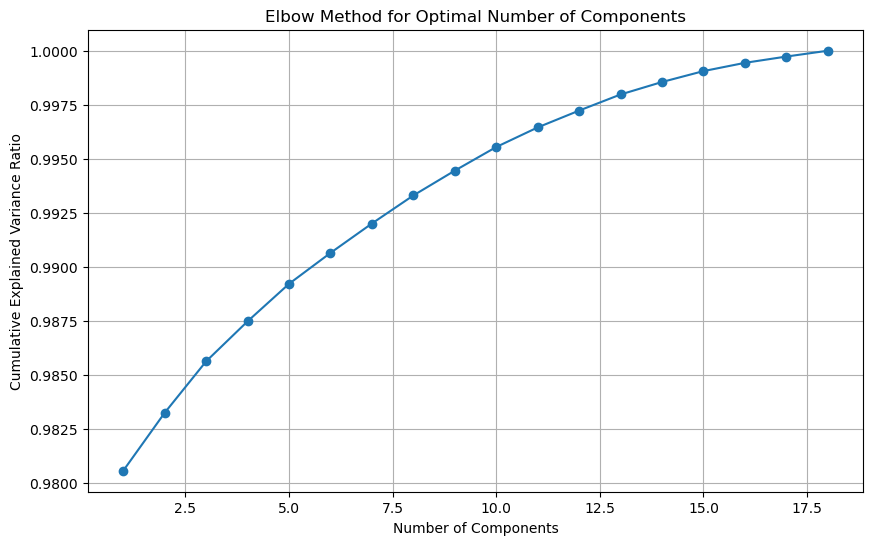

In [133]:
import matplotlib.pyplot as plt

# Calculate explained variance ratio
explained_variance_ratio = s**2 / np.sum(s**2)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Method for Optimal Number of Components')
plt.grid(True)
plt.show()

In [134]:
# Find the optimal number of features based on the Elbow Method
elbow_point = 0
for i in range(1, len(cumulative_variance_ratio)):
    if cumulative_variance_ratio[i] - cumulative_variance_ratio[i - 1] < 0.001:
        elbow_point = i
        break
elbow_point

10

In [135]:
U, s, sigma, V_trans = ReducedSVD(mat, to_remove=elbow_point)

svd of [[3.4669801  3.97505051 5.         ... 4.         4.         4.42857143]
 [3.         3.68852014 3.73333333 ... 3.73684211 3.         3.89873418]
 [2.66666667 3.97505051 4.         ... 4.         4.5        4.        ]
 ...
 [2.5        3.4669801  4.         ... 4.         3.74583333 3.88888889]
 [4.         3.69666667 4.11111111 ... 4.1        3.6        4.        ]
 [2.59090909 4.5        3.69565217 ... 2.81818182 3.5        3.82162162]]:[[69553.11969542 73970.23114199 78142.92313113 73443.06070844
  73826.99349428 73426.43995419 74989.78390417 74439.50526981
  70861.86661241 71941.00076213 72763.70548767 73341.63864897
  72395.90220767 77719.64140162 70604.84739286 71490.73516153
  71624.88689677 76179.99440842]
 [73970.23114199 84285.94341405 86667.13652428 81408.70403822
  81394.08745167 81545.36576079 83051.58152006 82390.20907096
  78003.06259974 79366.7196219  80582.68055169 81426.6640398
  80091.78948003 86483.14193917 78186.81843714 78954.95656798
  79254.28292451 8459

In [136]:
mat = U @ sigma @ V_trans

In [137]:
def minkowski_distance(x1, x2, p):
    return np.power(np.sum(np.abs(x1-x2)**p), 1/p)

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1-x2))

def distance_func(x1, x2, p, choice):
    if choice == 'Eucledian':
        return eucledian_distance(x1, x2)
    elif choice == 'Minkowski':
        return minkowski_distance(x1, x2, p)
    elif choice == 'Manhattan':
        return manhattan_distance(x1, x2)
    else:
        return eucledian_distance(x1, x2)


class Kmeans:
    def __init__(self, K, iter, p, dist_choice, random_state=42):
        self.K = K
        self.iter = iter
        self.p = p
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []
        self.inertia = 0.0
        self.random_state = random_state
        self.dist_choice = dist_choice
        np.random.seed(random_state)

    def plusplus(self, ds: np.array, k, random_state=1000):
        np.random.seed(random_state)
        centroids = [ds[0]]

        for _ in range(1, k):
            dist_sq = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in ds])
            probs = dist_sq/dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probs):
                if r < p:
                    i = j
                    break
            centroids.append(ds[i])
        return np.array(centroids)

    def naive_sharding(self, ds:np.array, k):
        n = np.shape(ds)[1]
        m = np.shape(ds)[0]
        centroids = np.mat(np.zeros((k, n)))
        composite = np.mat(np.sum(ds, axis=1))
        ds = np.append(composite.T, ds, axis=1)
        ds.sort(axis=0)
        step = floor(m/k)
        def _get_mean(sums, step):
            return sums/step
        vmean = np.vectorize(_get_mean)
        for j in range(k):
            if j == k-1:
                centroids[j:] = vmean(np.sum(ds[j*step:, 1:], axis=0), step)
            else:
                centroids[j:] = vmean(np.sum(ds[j*step:(j+1)*step, 1:], axis=0), step)
        return np.array(centroids)

    def predict(self, X, choice=0):
        self.X = X
        self.n_samples, self.n_features = X.shape

        if choice == 0:
            np.random.seed(self.random_state)
            centroids = np.zeros((self.K, self.n_features))
            for k in range(self.K):
                centroid = X[np.random.choice(range(self.n_samples))]
                centroids[k] = centroid
            self.centroids = centroids
        elif choice == 1:
            self.centroids = self.plusplus(X, self.K)
        elif choice == 2:
            self.centroids = self.naive_sharding(X, self.K)

        for _ in range(self.iter):
            self.clusters = self._create_clusters(self.centroids)
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self._isConverged(centroids_old, self.centroids):
                break

        labels = self.getClusterLabels(self.clusters)
        self.calculateInertia(X, labels)
        return labels, self.centroids

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def test_function(self, point):
        return distance_func(self.sample, point, self.p, self.dist_choice)

    def _closest_centroid(self, sample, centroids):
        distances = [distance_func(sample, point, self.p, self.dist_choice) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            if (len(cluster) != 0):
                cluster_mean = np.mean(self.X[cluster], axis=0)
                centroids[cluster_idx] = cluster_mean
        return centroids

    def _isConverged(self, centroids_old, centroids):
        distances = [distance_func(centroids_old[i], centroids[i], self.p, self.dist_choice) for i in range(self.K)]
        return sum(distances) == 0

    def getClusterLabels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def calculateInertia(self, datapoints: list[int], labels: list[any]) -> None:
        labels = labels.astype(int)
        for idx, pts in enumerate(datapoints):
            self.inertia += distance_func(self.centroids[labels[idx]], pts, 2 , self.dist_choice) ** 2

    def predictPoint(self, datapoint):
        distances = []
        for idx, i in enumerate(self.centroids):
            if sum(i) == 0:
                continue
            else:
                distances.append([distance_func(datapoint, i, self.p), idx], self.dist_choice)
        distances.sort()
        return distances[0][1]


In [138]:
grouped_data.columns

Index(['genre_Horror', 'genre_Documentary', 'genre_War', 'genre_Romance',
       'genre_Thriller', 'genre_Animation', 'genre_Crime', 'genre_Mystery',
       'genre_Sci-Fi', 'genre_Action', 'genre_Western', 'genre_Musical',
       'genre_Comedy', 'genre_Film-Noir', 'genre_Children's',
       'genre_Adventure', 'genre_Fantasy', 'genre_Drama'],
      dtype='object')

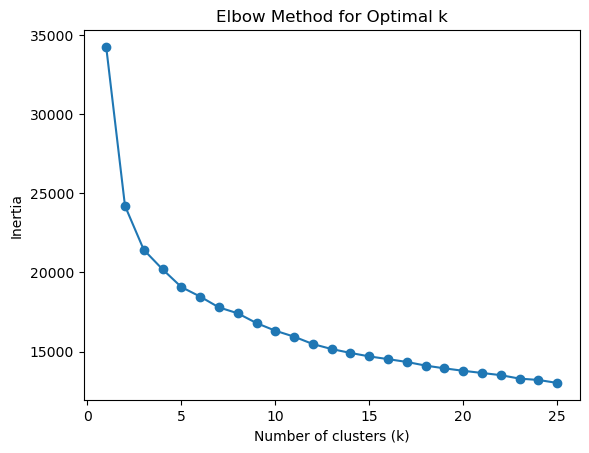

In [170]:
# Function to calculate inertia for a given value of k
def calculate_inertia(X, k, iter=10, p=2, dist_choice='Eucledian'):
    kmeans = Kmeans(K=k, iter=iter, p=p, dist_choice=dist_choice)
    labels, centroids = kmeans.predict(X)
    inertia = kmeans.inertia
    return inertia

# Function to plot inertia values for a range of k values
def plot_inertia(X, max_k, iter=10, p=2, dist_choice='Eucledian'):
    inertia_values = []
    k_values = range(1, max_k + 1)
    for k in k_values:
        inertia = calculate_inertia(X, k, iter, p, dist_choice)
        inertia_values.append(inertia)
    plt.plot(k_values, inertia_values, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Example usage
max_k = 25  # Maximum value of k to try
plot_inertia(mat, max_k)

In [171]:
kmeans = Kmeans(K=10, iter=100, p=2, dist_choice='Eucledian', random_state=42)

In [172]:
cluster_labels, centroids = kmeans.predict(mat)

In [173]:
centroids.shape

(10, 18)

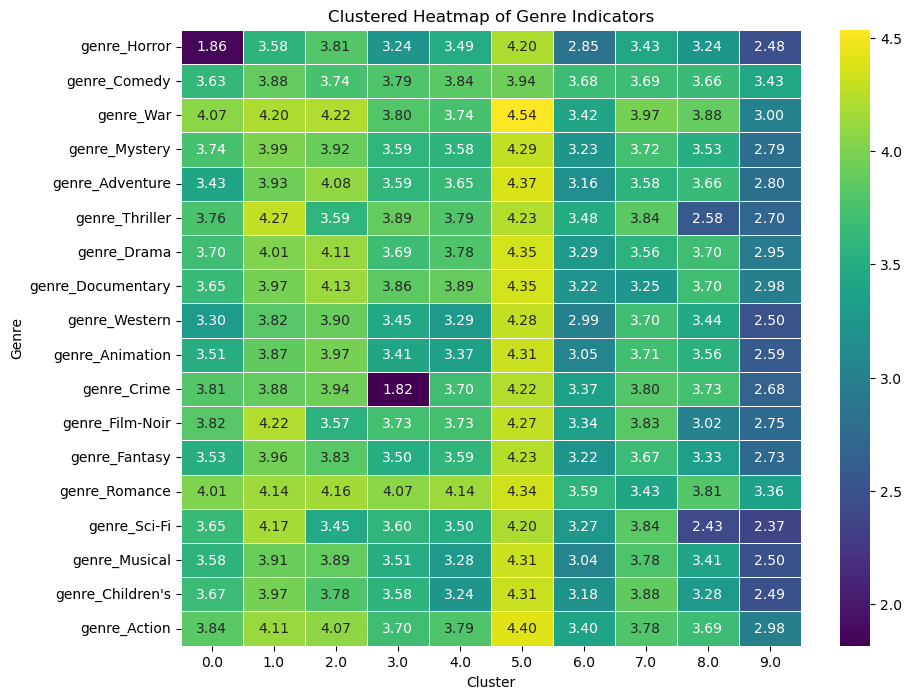

In [174]:
import seaborn as sns

# Create a DataFrame with genre indicators and cluster labels
clustered_data = pd.DataFrame(data=mat, columns=['genre_Horror', 'genre_Comedy', 'genre_War', 'genre_Mystery',
                                                'genre_Adventure', 'genre_Thriller', 'genre_Drama', 'genre_Documentary',
                                                'genre_Western', 'genre_Animation', 'genre_Crime', 'genre_Film-Noir',
                                                'genre_Fantasy', 'genre_Romance', 'genre_Sci-Fi', 'genre_Musical',
                                                "genre_Children's", 'genre_Action'])
clustered_data['Cluster'] = cluster_labels

# Calculate the mean genre indicators for each cluster
cluster_means = clustered_data.groupby('Cluster').mean()

# Create a clustered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_means.T, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Clustered Heatmap of Genre Indicators')
plt.xlabel('Cluster')
plt.ylabel('Genre')
plt.show()


In [175]:
testing_data

,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama,user_id,cluster_label
0,2.785714,3.857143,2.875000,2.932773,2.702703,3.290323,3.361702,2.611111,2.772727,2.710000,3.000000,3.117647,3.031142,3.333333,2.857143,2.756757,2.891892,3.198556,5530,3.0
1,4.000000,3.696667,4.142857,3.866667,4.166667,4.000000,3.785714,4.153846,4.230769,4.055556,4.000000,4.250000,3.833333,3.571429,4.000000,3.833333,4.000000,4.015625,711,5.0
2,3.792199,5.000000,4.142857,3.750000,4.125000,3.569986,4.500000,3.000000,3.000000,3.500000,3.745833,4.000000,3.833333,3.666667,3.500000,3.500000,4.000000,4.030303,4924,7.0
3,4.333333,4.000000,4.285714,3.000000,3.571429,4.500000,3.500000,3.000000,3.833333,3.666667,3.673059,3.000000,4.181818,2.666667,4.000000,4.250000,3.745833,4.105263,2154,7.0
4,3.833333,4.000000,4.250000,3.779661,4.242424,4.222222,4.300000,4.142857,4.105263,3.965517,4.428571,4.062500,3.758242,4.466667,3.750000,3.937500,4.000000,4.078431,1273,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.000000,4.000000,3.416667,3.000000,3.255814,3.673059,3.619048,3.400000,2.875000,3.103448,4.000000,3.333333,2.842105,3.500000,2.000000,3.375000,3.792199,3.398876,3246,2.0
196,4.200000,3.663481,4.727273,4.000000,4.625000,3.500000,4.600000,4.750000,4.300000,4.550000,5.000000,3.696667,4.250000,5.000000,3.500000,4.888889,5.000000,4.511111,1972,5.0
197,3.200000,3.000000,3.898734,3.937500,3.608696,3.571429,4.000000,5.000000,3.430769,3.571429,3.500000,3.500000,3.466667,4.000000,3.111111,3.517241,3.714286,3.886792,3860,9.0
198,3.673059,3.663481,4.750000,4.000000,4.000000,5.000000,3.000000,3.500000,5.000000,4.750000,4.500000,3.569986,3.692308,3.000000,5.000000,5.000000,3.696667,4.461538,502,5.0


In [176]:
test_mat = np.array(testing_data)
U_test, s_test, sigma_test, V_trans_test = ReducedSVD(test_mat, to_remove=10)
test_mat = U_test @ sigma_test @ V_trans_test
cluster_labels_test, _ = kmeans.predict(test_mat)

svd of [[2.78571429e+00 3.85714286e+00 2.87500000e+00 ... 3.19855596e+00
  5.53000000e+03 3.00000000e+00]
 [4.00000000e+00 3.69666667e+00 4.14285714e+00 ... 4.01562500e+00
  7.11000000e+02 5.00000000e+00]
 [3.79219891e+00 5.00000000e+00 4.14285714e+00 ... 4.03030303e+00
  4.92400000e+03 7.00000000e+00]
 ...
 [3.20000000e+00 3.00000000e+00 3.89873418e+00 ... 3.88679245e+00
  3.86000000e+03 9.00000000e+00]
 [3.67305915e+00 3.66348134e+00 4.75000000e+00 ... 4.46153846e+00
  5.02000000e+02 5.00000000e+00]
 [2.62500000e+00 3.66348134e+00 4.16666667e+00 ... 3.84615385e+00
  3.13400000e+03 9.00000000e+00]]:[[2.54081523e+03 2.60958231e+03 2.83358497e+03 2.60177235e+03
  2.64606932e+03 2.61008309e+03 2.63772006e+03 2.63236901e+03
  2.55282141e+03 2.58458504e+03 2.61831706e+03 2.59959264e+03
  2.59072765e+03 2.76636187e+03 2.51682841e+03 2.61012502e+03
  2.55483754e+03 2.73269235e+03 1.94484465e+06 2.89208452e+03]
 [2.60958231e+03 2.87227774e+03 3.00400491e+03 2.75835685e+03
  2.78876409e+03 2.7

In [177]:
cluster_labels_test

array([0., 7., 6., 5., 4., 5., 5., 3., 7., 8., 9., 4., 8., 6., 9., 2., 5.,
       0., 0., 7., 7., 7., 6., 5., 0., 8., 4., 0., 6., 5., 1., 2., 5., 9.,
       3., 0., 0., 1., 6., 3., 8., 5., 4., 8., 2., 1., 1., 4., 4., 1., 7.,
       0., 6., 7., 7., 5., 9., 2., 8., 5., 0., 3., 7., 2., 5., 6., 6., 2.,
       6., 5., 0., 5., 8., 3., 6., 9., 2., 1., 3., 8., 7., 5., 4., 6., 8.,
       9., 4., 6., 7., 0., 0., 4., 2., 2., 2., 6., 1., 2., 4., 9., 3., 1.,
       1., 8., 2., 9., 4., 5., 7., 5., 9., 7., 4., 0., 5., 4., 6., 6., 1.,
       2., 2., 9., 7., 9., 2., 3., 8., 1., 5., 5., 6., 9., 3., 2., 5., 2.,
       0., 5., 9., 7., 7., 1., 2., 0., 4., 9., 0., 2., 2., 2., 0., 9., 6.,
       8., 7., 3., 6., 8., 4., 3., 6., 3., 8., 9., 5., 2., 2., 8., 2., 0.,
       0., 9., 0., 8., 7., 1., 7., 4., 5., 1., 6., 3., 3., 0., 6., 3., 6.,
       3., 1., 7., 5., 4., 1., 9., 8., 3., 2., 9., 7., 3.])

In [178]:
userData

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [179]:
movieData

,movie_id,title,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama
0,1,Toy Story (1995),0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,2,Jumanji (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,3,Grumpier Old Men (1995),0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [180]:
data

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,4211,3791,2
1000205,4211,3806,3
1000206,4211,3840,4
1000207,4211,3766,2


In [181]:
user_movie_ratings = data.pivot(index='user_id', columns='movie_id', values='rating')

In [182]:
user_movie_ratings

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
grouped_data

,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,genre_Western,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama,user_id,cluster_label
0,3.466980,3.975051,5.000000,3.666667,3.666667,4.111111,4.000000,3.569986,4.333333,4.200000,3.696667,4.285714,4.142857,3.745833,4.250000,4.000000,4.000000,4.428571,1,1.0
1,3.000000,3.688520,3.733333,3.708333,3.483871,3.663481,3.583333,3.333333,3.588235,3.500000,4.333333,3.792199,3.560000,4.000000,3.696667,3.736842,3.000000,3.898734,2,4.0
2,2.666667,3.975051,4.000000,3.800000,3.800000,4.000000,3.913706,3.000000,3.833333,3.956522,4.666667,4.000000,3.766667,3.696667,4.000000,4.000000,4.500000,4.000000,3,7.0
3,4.333333,3.466980,3.333333,4.000000,3.500000,3.663481,5.000000,3.975051,3.555556,4.157895,4.500000,3.792199,3.744442,3.696667,4.000000,3.833333,4.500000,4.166667,4,2.0
4,2.800000,3.666667,3.500000,3.100000,2.846154,4.000000,3.285714,3.125000,3.066667,2.612903,4.000000,3.333333,3.410714,4.000000,3.833333,3.000000,3.673059,3.096154,5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2.986486,3.909091,3.785714,3.352459,3.142857,3.911765,3.528302,3.411765,2.834320,3.000000,3.642857,3.709677,3.203065,4.058824,3.444444,2.987952,3.000000,3.505376,6036,6.0
5836,4.111111,4.000000,4.000000,3.681818,3.705882,4.000000,3.833333,3.692308,3.692308,3.642857,3.750000,4.000000,3.576271,3.444444,3.666667,4.000000,4.250000,3.877551,6037,7.0
5837,2.500000,3.466980,4.000000,4.166667,3.673059,3.666667,3.663481,3.774713,4.000000,3.000000,3.975051,3.913706,3.833333,3.696667,3.000000,4.000000,3.745833,3.888889,6038,0.0
5838,4.000000,3.696667,4.111111,3.800000,4.142857,3.615385,4.000000,4.176471,4.250000,4.000000,4.500000,3.690476,3.723077,4.500000,3.529412,4.100000,3.600000,4.000000,6039,2.0


In [184]:
cluster_labels_series = pd.Series(cluster_labels, name='cluster_label')
cluster_labels_series

0       1.0
1       4.0
2       7.0
3       2.0
4       6.0
       ... 
5835    6.0
5836    7.0
5837    0.0
5838    2.0
5839    4.0
Name: cluster_label, Length: 5840, dtype: float64

In [185]:
cluster_labels_series_test = pd.Series(cluster_labels_test, name='cluster_label')
cluster_labels_series_test

0      0.0
1      7.0
2      6.0
3      5.0
4      4.0
      ... 
195    3.0
196    2.0
197    9.0
198    7.0
199    3.0
Name: cluster_label, Length: 200, dtype: float64

In [186]:
testing_data['user_id'] = testing_data.index
testing_data.reset_index(drop=True, inplace=True)
testing_data = pd.concat([testing_data, cluster_labels_series_test], axis=1)

In [187]:
testing_data

,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,...,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama,user_id,cluster_label,cluster_label
0,2.785714,3.857143,2.875000,2.932773,2.702703,3.290323,3.361702,2.611111,2.772727,2.710000,...,3.117647,3.031142,3.333333,2.857143,2.756757,2.891892,3.198556,0,3.0,0.0
1,4.000000,3.696667,4.142857,3.866667,4.166667,4.000000,3.785714,4.153846,4.230769,4.055556,...,4.250000,3.833333,3.571429,4.000000,3.833333,4.000000,4.015625,1,5.0,7.0
2,3.792199,5.000000,4.142857,3.750000,4.125000,3.569986,4.500000,3.000000,3.000000,3.500000,...,4.000000,3.833333,3.666667,3.500000,3.500000,4.000000,4.030303,2,7.0,6.0
3,4.333333,4.000000,4.285714,3.000000,3.571429,4.500000,3.500000,3.000000,3.833333,3.666667,...,3.000000,4.181818,2.666667,4.000000,4.250000,3.745833,4.105263,3,7.0,5.0
4,3.833333,4.000000,4.250000,3.779661,4.242424,4.222222,4.300000,4.142857,4.105263,3.965517,...,4.062500,3.758242,4.466667,3.750000,3.937500,4.000000,4.078431,4,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.000000,4.000000,3.416667,3.000000,3.255814,3.673059,3.619048,3.400000,2.875000,3.103448,...,3.333333,2.842105,3.500000,2.000000,3.375000,3.792199,3.398876,195,2.0,3.0
196,4.200000,3.663481,4.727273,4.000000,4.625000,3.500000,4.600000,4.750000,4.300000,4.550000,...,3.696667,4.250000,5.000000,3.500000,4.888889,5.000000,4.511111,196,5.0,2.0
197,3.200000,3.000000,3.898734,3.937500,3.608696,3.571429,4.000000,5.000000,3.430769,3.571429,...,3.500000,3.466667,4.000000,3.111111,3.517241,3.714286,3.886792,197,9.0,9.0
198,3.673059,3.663481,4.750000,4.000000,4.000000,5.000000,3.000000,3.500000,5.000000,4.750000,...,3.569986,3.692308,3.000000,5.000000,5.000000,3.696667,4.461538,198,5.0,7.0


In [188]:
grouped_data['user_id'] = grouped_data.index

In [189]:
grouped_data.reset_index(drop=True, inplace=True)

# Concatenate grouped_data with cluster_labels_series
grouped_data = pd.concat([grouped_data, cluster_labels_series], axis=1)

In [190]:
grouped_data.columns

Index(['genre_Horror', 'genre_Documentary', 'genre_War', 'genre_Romance',
       'genre_Thriller', 'genre_Animation', 'genre_Crime', 'genre_Mystery',
       'genre_Sci-Fi', 'genre_Action', 'genre_Western', 'genre_Musical',
       'genre_Comedy', 'genre_Film-Noir', 'genre_Children's',
       'genre_Adventure', 'genre_Fantasy', 'genre_Drama', 'user_id',
       'cluster_label', 'cluster_label'],
      dtype='object')

In [191]:
print(len(user_movie_ratings.columns))

3706


In [192]:
grouped_data

,genre_Horror,genre_Documentary,genre_War,genre_Romance,genre_Thriller,genre_Animation,genre_Crime,genre_Mystery,genre_Sci-Fi,genre_Action,...,genre_Musical,genre_Comedy,genre_Film-Noir,genre_Children's,genre_Adventure,genre_Fantasy,genre_Drama,user_id,cluster_label,cluster_label
0,3.466980,3.975051,5.000000,3.666667,3.666667,4.111111,4.000000,3.569986,4.333333,4.200000,...,4.285714,4.142857,3.745833,4.250000,4.000000,4.000000,4.428571,0,1.0,1.0
1,3.000000,3.688520,3.733333,3.708333,3.483871,3.663481,3.583333,3.333333,3.588235,3.500000,...,3.792199,3.560000,4.000000,3.696667,3.736842,3.000000,3.898734,1,4.0,4.0
2,2.666667,3.975051,4.000000,3.800000,3.800000,4.000000,3.913706,3.000000,3.833333,3.956522,...,4.000000,3.766667,3.696667,4.000000,4.000000,4.500000,4.000000,2,7.0,7.0
3,4.333333,3.466980,3.333333,4.000000,3.500000,3.663481,5.000000,3.975051,3.555556,4.157895,...,3.792199,3.744442,3.696667,4.000000,3.833333,4.500000,4.166667,3,2.0,2.0
4,2.800000,3.666667,3.500000,3.100000,2.846154,4.000000,3.285714,3.125000,3.066667,2.612903,...,3.333333,3.410714,4.000000,3.833333,3.000000,3.673059,3.096154,4,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2.986486,3.909091,3.785714,3.352459,3.142857,3.911765,3.528302,3.411765,2.834320,3.000000,...,3.709677,3.203065,4.058824,3.444444,2.987952,3.000000,3.505376,5835,6.0,6.0
5836,4.111111,4.000000,4.000000,3.681818,3.705882,4.000000,3.833333,3.692308,3.692308,3.642857,...,4.000000,3.576271,3.444444,3.666667,4.000000,4.250000,3.877551,5836,7.0,7.0
5837,2.500000,3.466980,4.000000,4.166667,3.673059,3.666667,3.663481,3.774713,4.000000,3.000000,...,3.913706,3.833333,3.696667,3.000000,4.000000,3.745833,3.888889,5837,0.0,0.0
5838,4.000000,3.696667,4.111111,3.800000,4.142857,3.615385,4.000000,4.176471,4.250000,4.000000,...,3.690476,3.723077,4.500000,3.529412,4.100000,3.600000,4.000000,5838,2.0,2.0


In [193]:
import numpy as np

unique_clusters = testing_data['cluster_label'].unique()

# Initialize an empty dictionary to store average ratings for each cluster
average_ratings_matrix = {}

# Iterate over each unique cluster
for cluster_label in unique_clusters:
    # Get the indices of users belonging to the current cluster
    cluster_users_indices = grouped_data[grouped_data['cluster_label'] == cluster_label]['user_id']
    
    # Filter the user-movie matrix for the users belonging to the current cluster
    cluster_user_movie_ratings = user_movie_ratings.loc[cluster_users_indices]
    
    # Calculate the average rating for each movie in the cluster
    average_ratings = cluster_user_movie_ratings.mean(axis=0)
    
    # Store the average ratings for the current cluster in the dictionary
    average_ratings_matrix[cluster_label] = average_ratings

# # Convert the dictionary to a DataFrame
average_ratings_df = pd.DataFrame(average_ratings_matrix)


# # Display the average ratings matrix
average_ratings_df
# average_ratings_matrix


AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
average_ratings_df = average_ratings_df.transpose()
average_ratings_df

In [ ]:
# Initialize an empty list to store squared errors
squared_errors = []

# Iterate over each user in the testing data
for index, row in testing_data.iterrows():
    user_id = row['user_id']
    cluster_label = row['cluster_label']
    
    # Retrieve the actual ratings of the user for movies
    actual_ratings = user_movie_ratings.loc[user_id]
    
    # Retrieve the average ratings of movies by users in the same cluster
    average_ratings = average_ratings_df.loc[cluster_label]
    
    # Calculate the predicted ratings using average ratings
    predicted_ratings = average_ratings.loc[actual_ratings.index]
    
    # Filter out NaN values from actual_ratings and predicted_ratings
    valid_indices = ~np.logical_or(np.isnan(actual_ratings), np.isnan(predicted_ratings))
    actual_ratings = actual_ratings[valid_indices]
    predicted_ratings = predicted_ratings[valid_indices]
    
    # Compute squared errors between actual and predicted ratings
    errors = (actual_ratings - predicted_ratings) ** 2
    
    # Append the squared errors to the list
    squared_errors.extend(errors)

# Calculate the Mean Squared Error
mse = np.mean(squared_errors)
print("Mean Squared Error:", mse)

In [165]:
# Recommending top-5 movies
import pandas as pd

# Function to get top 5 rated movies for each cluster excluding those watched by the test user
def get_top_movies_for_cluster(cluster_label, user_id):
    # Get average ratings for the cluster
    average_ratings_cluster = average_ratings_df.loc[cluster_label]
    
    # Sort movies by average rating in descending order
    top_movies_cluster = average_ratings_cluster.sort_values(ascending=False, key=abs)
    
    # Filter out movies already watched by the test user
    watched_movies = user_movie_ratings.loc[user_id].dropna().index
    top_movies_cluster = top_movies_cluster[~top_movies_cluster.index.isin(watched_movies)]
    
    # Return top 5 movies (if available)
    return top_movies_cluster.head(5).index.tolist()

# Initialize a dictionary to store top 5 movies for each test user
top5_movies_for_users = {}

# Iterate over each user in the testing data
for index, row in testing_data.iterrows():
    user_id = row['user_id']
    cluster_label = row['cluster_label']
    
    # Get top 5 movies for the user's cluster
    top_movies_cluster = get_top_movies_for_cluster(cluster_label, user_id)
    
    # Store the top 5 movies for the user
    top5_movies_for_users[user_id] = top_movies_cluster

# Create a DataFrame to represent the matrix for the test users
columns = ['movie1', 'movie2', 'movie3', 'movie4', 'movie5']
test_users_matrix = pd.DataFrame.from_dict(top5_movies_for_users, orient='index', columns=columns)

# Display the matrix
print(test_users_matrix)

        movie1  movie2  movie3  movie4  movie5
5530.0     199    3275    1703    3117    3140
711.0     3012    1117     128    3395    2507
4924.0    3002    1519    2358    1743    1715
2154.0    3002    1519    2358    1743    1715
1273.0    3012    1117     128    3395    2507
...        ...     ...     ...     ...     ...
3246.0     369    2426     324    1880    2158
1972.0    3012    1117     128    3395    2507
3860.0     106    1664    1369    2964    3382
502.0     3012    1117     128    3395    2507
3134.0     106    1664    1369    2964    3382

[200 rows x 5 columns]


In [166]:
# Create a dictionary to map movie_id to movie titles
movie_id_to_title = dict(zip(movieData['movie_id'], movieData['title']))

# Replace movie_id with movie titles in test_users_matrix
test_users_matrix = test_users_matrix.applymap(lambda x: movie_id_to_title.get(x, np.nan))

In [167]:
type(test_users_matrix['movie1'].iloc[1])

str

In [168]:
test_users_matrix

,movie1,movie2,movie3,movie4,movie5
5530.0,"Umbrellas of Cherbourg, The (Parapluies de Che...","Boondock Saints, The (1999)",For Richer or Poorer (1997),Ride with the Devil (1999),"Three Ages, The (1923)"
711.0,Battling Butler (1926),"Eighth Day, The (Le Huitième jour ) (1996)",Jupiter's Wife (1994),Nadine (1987),Breakfast of Champions (1999)
4924.0,My Best Fiend (Mein liebster Feind) (1999),Broken English (1996),Savior (1998),Arguing the World (1996),Office Killer (1997)
2154.0,My Best Fiend (Mein liebster Feind) (1999),Broken English (1996),Savior (1998),Arguing the World (1996),Office Killer (1997)
1273.0,Battling Butler (1926),"Eighth Day, The (Le Huitième jour ) (1996)",Jupiter's Wife (1994),Nadine (1987),Breakfast of Champions (1999)
...,...,...,...,...,...
3246.0,Mrs. Parker and the Vicious Circle (1994),"Theory of Flight, The (1998)","Sum of Us, The (1994)",Lawn Dogs (1997),"Henry: Portrait of a Serial Killer, Part 2 (1996)"
1972.0,Battling Butler (1926),"Eighth Day, The (Le Huitième jour ) (1996)",Jupiter's Wife (1994),Nadine (1987),Breakfast of Champions (1999)
3860.0,Nobody Loves Me (Keiner liebt mich) (1994),Nénette et Boni (1996),I Can't Sleep (J'ai pas sommeil) (1994),Julien Donkey-Boy (1999),Song of Freedom (1936)
502.0,Battling Butler (1926),"Eighth Day, The (Le Huitième jour ) (1996)",Jupiter's Wife (1994),Nadine (1987),Breakfast of Champions (1999)


In [169]:
# Recommending latets movies
import re
def extract_year(title):
    year = None
    match = re.search(r'\((\d{4})\)', title)
    if match:
        year = int(match.group(1))
    return year

extracted_years_df = test_users_matrix.applymap(extract_year)

# Sort each row based on the extracted years
sorted_matrix = pd.DataFrame([row.sort_values(ascending=False).index.map(lambda x: test_users_matrix.loc[i, x]) for i, row in extracted_years_df.iterrows()], columns=test_users_matrix.columns, index=test_users_matrix.index)

sorted_matrix

,movie1,movie2,movie3,movie4,movie5
5530.0,"Boondock Saints, The (1999)",Ride with the Devil (1999),For Richer or Poorer (1997),"Umbrellas of Cherbourg, The (Parapluies de Che...","Three Ages, The (1923)"
711.0,Breakfast of Champions (1999),"Eighth Day, The (Le Huitième jour ) (1996)",Jupiter's Wife (1994),Nadine (1987),Battling Butler (1926)
4924.0,My Best Fiend (Mein liebster Feind) (1999),Savior (1998),Office Killer (1997),Broken English (1996),Arguing the World (1996)
2154.0,My Best Fiend (Mein liebster Feind) (1999),Savior (1998),Office Killer (1997),Broken English (1996),Arguing the World (1996)
1273.0,Breakfast of Champions (1999),"Eighth Day, The (Le Huitième jour ) (1996)",Jupiter's Wife (1994),Nadine (1987),Battling Butler (1926)
...,...,...,...,...,...
3246.0,"Theory of Flight, The (1998)",Lawn Dogs (1997),"Henry: Portrait of a Serial Killer, Part 2 (1996)",Mrs. Parker and the Vicious Circle (1994),"Sum of Us, The (1994)"
1972.0,Breakfast of Champions (1999),"Eighth Day, The (Le Huitième jour ) (1996)",Jupiter's Wife (1994),Nadine (1987),Battling Butler (1926)
3860.0,Julien Donkey-Boy (1999),Nénette et Boni (1996),Nobody Loves Me (Keiner liebt mich) (1994),I Can't Sleep (J'ai pas sommeil) (1994),Song of Freedom (1936)
502.0,Breakfast of Champions (1999),"Eighth Day, The (Le Huitième jour ) (1996)",Jupiter's Wife (1994),Nadine (1987),Battling Butler (1926)
